In [1]:
import pandas as pd
import os
from os import listdir


In [2]:
##MERGING 12 MONTHS OF DATA INTO ONE FILE

In [3]:
files = [f for f in os.listdir("./Sales_Data/")]

In [4]:
resultado = pd.DataFrame()
csv = pd.DataFrame()
for file in files:
    csv = pd.read_csv("./Sales_Data/"+file)
    resultado = pd.concat([resultado, csv], axis = 0)
    resultado.to_csv("./todos.csv")


In [5]:
todos_arquivos = pd.read_csv("./todos.csv")

In [6]:
todos_arquivos.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
6,6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016"
7,7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101"
8,8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301"
9,9,176565,Macbook Pro Laptop,1,1700,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016"


### What was the best month for sales and how much was earned that month?

In [7]:
todos_arquivos= todos_arquivos.dropna() #Dropa todos os NaN

In [8]:
#Para remover todas as linhas em que na coluna "Quantity Ordered" o valor seja igual ao nome da coluna
todos_arquivos.drop(todos_arquivos[todos_arquivos["Quantity Ordered"] == "Quantity Ordered"].index, inplace=True)

In [9]:
todos_arquivos["Quantity Ordered"] = pd.to_numeric(todos_arquivos["Quantity Ordered"])   #Transformar string pra inteiro
todos_arquivos["Price Each"] = pd.to_numeric(todos_arquivos["Price Each"])  #Transformar string pra inteiro
todos_arquivos["Total"] = todos_arquivos["Quantity Ordered"] * todos_arquivos["Price Each"] #Nova coluna para receber o resultado

In [10]:
#Nova colona de meses para filtrar os valores por mês
todos_arquivos["Month"] = pd.to_numeric(todos_arquivos["Order Date"].str[0:2])

In [11]:
#Rearranjo de colunas
columns = ["Order ID", "Product", "Quantity Ordered", "Price Each","Total", "Month", "Order Date", "Purchase Address"]
todos_arquivos = todos_arquivos.reindex(columns = columns)

In [12]:
#Resposta
todos_arquivos.groupby("Month").sum()["Total"]

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total, dtype: float64

Text(0.5, 0, 'Month')

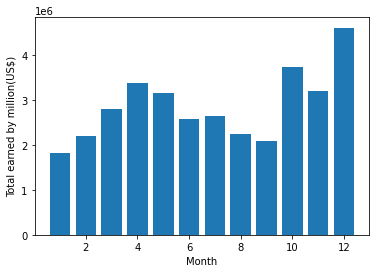

In [13]:
#Making a graphic
import matplotlib.pyplot as plt
months = range(1,13)
result = todos_arquivos.groupby("Month").sum()["Total"]
plt.bar(months,result)
plt.ylabel("Total earned by million(US$)")
plt.xlabel("Month")

## What US city had the highest number of sales

In [14]:
todos_arquivos.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Month,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
def get_city(adress):
    return adress.split(",")[1]
def get_state(adress):
    return adress.split(",")[2].split(" ")[1]
todos_arquivos["City"] = todos_arquivos["Purchase Address"].apply(lambda x: get_city(x) + " " + get_state(x))

In [16]:
todos_arquivos.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Month,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


In [17]:
second_answer = todos_arquivos.groupby("City").sum()
second_answer

,Quantity Ordered,Price Each,Total,Month
City,,,,
Atlanta GA,16602,2779908.20,2795498.58,104794
Austin TX,11153,1809873.61,1819581.75,69829
Boston MA,22528,3637409.77,3661642.01,141112
Dallas TX,16730,2752627.82,2767975.40,104620
Los Angeles CA,33289,5421435.23,5452570.80,208325
New York City NY,27932,4635370.83,4664317.43,175741
Portland ME,2750,447189.25,449758.27,17144
Portland OR,11303,1860558.22,1870732.34,70621
San Francisco CA,50239,8211461.74,8262203.91,315520


## What time we should display advertisement to maximize thelikelihood of purchase?

In [18]:
todos_arquivos.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Month,Order Date,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,4,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Boston MA
3,176560,Google Phone,1,600.00,600.00,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
4,176560,Wired Headphones,1,11.99,11.99,4,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA
5,176561,Wired Headphones,1,11.99,11.99,4,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Los Angeles CA


In [19]:
todos_arquivos["Order Date"] = pd.to_datetime(todos_arquivos["Order Date"])
todos_arquivos["Hour(DateTime)"] = todos_arquivos["Order Date"].dt.hour
todos_arquivos["Minutes(DateTime)"] = todos_arquivos["Order Date"].dt.minute


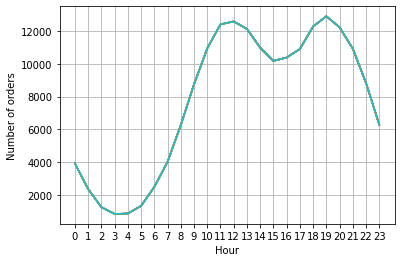

In [20]:
hours = [hour for hour, df in todos_arquivos.groupby("Hour(DateTime)")]
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.grid()
plt.plot(hours, todos_arquivos.groupby(["Hour(DateTime)"]).count())

In [21]:
todos_arquivos.head()

,Order ID,Product,Quantity Ordered,Price Each,Total,Month,Order Date,Purchase Address,City,Hour(DateTime),Minutes(DateTime)
0,176558,USB-C Charging Cable,2,11.95,23.90,4,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",Boston MA,22,30
3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,11.99,4,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",Los Angeles CA,9,27


##  What is the products are most often sold together

In [31]:
several_orders = todos_arquivos[todos_arquivos["Order ID"].duplicated(keep=False)]

several_orders["Grouped"] = several_orders.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))
several_orders.head()

/tmp/ipykernel_127621/2962710818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  several_orders["Grouped"] = several_orders.groupby("Order ID")["Product"].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Total,Month,Order Date,Purchase Address,City,Hour(DateTime),Minutes(DateTime),Grouped
3,176560,Google Phone,1,600.00,600.00,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,11.99,4,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",Los Angeles CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,600.00,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,11.95,4,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",Los Angeles CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,99.99,4,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",Boston MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [33]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in several_orders["Grouped"]:
    row_list = row.split(",")
    count.update(Counter(combinations(row_list, 2)))
print(count)




Counter({('iPhone', 'Lightning Charging Cable'): 2140, ('Google Phone', 'USB-C Charging Cable'): 2116, ('iPhone', 'Wired Headphones'): 987, ('Google Phone', 'Wired Headphones'): 949, ('iPhone', 'Apple Airpods Headphones'): 799, ('Vareebadd Phone', 'USB-C Charging Cable'): 773, ('Google Phone', 'Bose SoundSport Headphones'): 503, ('USB-C Charging Cable', 'Wired Headphones'): 452, ('Vareebadd Phone', 'Wired Headphones'): 327, ('Lightning Charging Cable', 'Wired Headphones'): 253, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 214, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 211, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 182, ('Apple Airpods Headphones', 'Wired Headphones'): 170, ('Bose SoundSport Headphones', 'Wired Headphones'): 140, ('Lightning Charging Cable', 'USB-C Charging Cable'): 120, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 114, ('Lightning Charging Cable', 'Lightning Charging Cable'): 111, ('AA Batteries (4-pack)', 'Lightning Chargi